# Problem 6: Basic compressive sensing experiment
Prof: Veniamin Morgenshtern

Solver: Andy Regensky

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cvx
import scipy as sp

print('Current version of cvxpy (should be higher than 1.0.0):', cvx.__version__)

('Current version of cvxpy (should be higher than 1.0.0):', '1.0.6')


1. Choose $n$ sufficiently large, but small enough such that your calculations run fast. For example, $n = 500$ might be a reasonable choice. Let $m \leq n$ be the number of measurements and $\delta = \frac{m}{n}$ be the undersampling ration. Set $\delta = \frac{1}{10}$ and choose $m$ accordingly. Generate the $m \times n$ measurement matrix $\mathbf{A}$ with i.i.d. entries distributed as $A_{ij} ~ \mathcal{N}(0,\frac{1}{m})$. Let s be the sparsity of the signal and $\rho = s/m < 1$ be the ratio between the number of measurements and the sparsity. Set $\rho = 1/5$ and choose s accordingly. Generate the signal $\mathbf{x_0} \in \mathbb{R}^n$ randomly with s nonzero components. You can choose the locations and the amplitudes of elements of $\mathbf{x_0}$ by some kind of random mechanism, the exact details of this mechanism are not important. Generate the data vector $\mathbf{b} = \mathbf{A}\mathbf{x_0}$.

In [2]:
# Initialize the parameters
n = 500
delta = 0.1
m = int(delta*n)
A = (1./m)*np.random.randn(m,n)

#rho = 0.5 #failure (too many nonzero elements)
rho = 0.1 #success (l1 reconstruction finds the exact solution)

s = int(rho*m)
x0 = np.zeros(n)
x0[np.random.permutation(n)[:s]] = np.random.randn(s)

b = A.dot(x0)

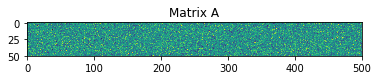

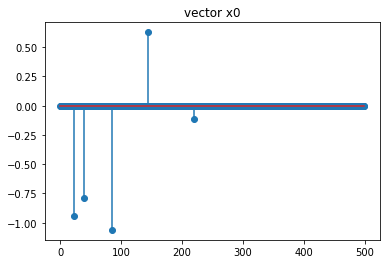

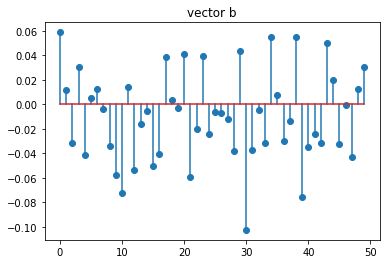

In [3]:
plt.imshow(A)
plt.title('Matrix A')
plt.show()

plt.stem(x0)
plt.title('vector x0')
plt.show()

plt.stem(b)
plt.title('vector b')
plt.show()

2\. Use cvxpy to solve
\begin{align}
    \min_x \ &\lvert\lvert \mathbf{x} \rvert \rvert_1 \\
    \text{subject to} \  &\mathbf{A}\mathbf{x}=\mathbf{b}
\end{align}
Denote the solution $\hat{\mathbf{x}}$.

In [4]:
def basisPursuit(A,b):
    x = cvx.Variable(A.shape[1])
    objective = cvx.Minimize(cvx.norm(x,1))
    constraints = [A*x == b]
    cvx.Problem(objective, constraints).solve(solver=cvx.ECOS)
    return np.array(x.value).flatten()

x_hat = basisPursuit(A,b)

3\. Is $\hat{\mathbf{x}} = \mathbf{x_0}$? To test this, 
calculate $\frac{\lvert\lvert \hat{\mathbf{x}}-\mathbf{x_0} \rvert\rvert}{\lvert\lvert \mathbf{x_0} \rvert\rvert}$. 
This number should be very small. If $\hat{\mathbf{x}} \neq \mathbf{x_0}$, reduce s and repeat the experiment.

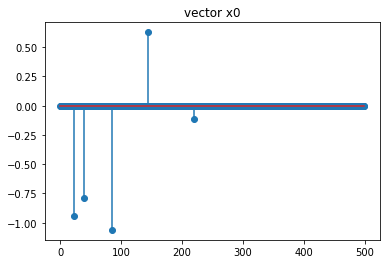

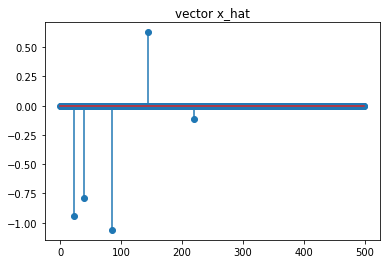

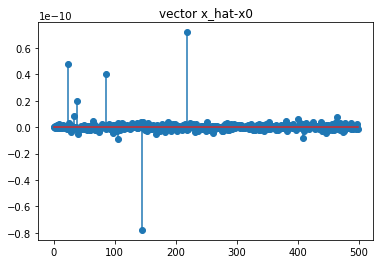

('Normalized norm of the error:', 7.479886202884408e-11)


In [5]:
plt.stem(x0)
plt.title('vector x0')
plt.show()
plt.stem(x_hat)
plt.title('vector x_hat')
plt.show()

plt.title('vector x_hat-x0')
plt.stem(x_hat-x0)
plt.show()

error = np.linalg.norm(x_hat-x0,2)/np.linalg.norm(x0,2)
print('Normalized norm of the error:', error)

4\. If $\hat{\mathbf{x}} = \mathbf{x_0}$, regenerate $\mathbf{x_0}$ while keeping s and $\mathbf{A}$ fixed. Do this many enough times to convince
yourself that the recovery is successful ($\hat{\mathbf{x}} = \mathbf{x_0}$) every time.

In [6]:
runs = 1e2
tol = 1e-5
cnt = 0
fails = 0
while (cnt < runs):
    x0 = np.zeros(n)
    x0[np.random.permutation(n)[:int(s)]] = np.random.randn(int(s))
    b = A.dot(x0)
    x_hat = basisPursuit(A,b)
    error = np.linalg.norm(x_hat-x0,2)/np.linalg.norm(x0,2)
    if (error > tol):
        fails += 1
    cnt += 1
        
print('Number of failed experiments:', fails)

('Number of failed experiments:', 0)


5\. Next, change the matrix $\mathbf{A}$ to be the subsampled discrete Fourier transform (DFT) matrix. Specifically, let $\mathbf{F}$ be the $n \times n$ DFT matrix. Then select m rows of $\mathbf{F}$ randomly and form $\mathbf{A}$ out of the selected set of row. Repeat the exercise for the new $\mathbf{A}$.

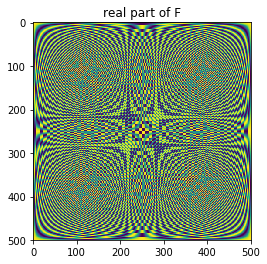

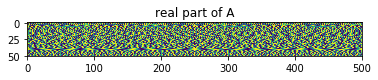

In [7]:
F = sp.linalg.dft(n)
A = F[np.random.permutation(n)[:m],:]

plt.imshow(np.real(F))
plt.title('real part of F')
plt.show()

plt.imshow(np.real(A))
plt.title('real part of A')
plt.show()

In [8]:
runs = 1e2
cnt = 0
fails = 0
tol = 1e-5 

errors = []

rho = 0.05 #success (l1 reconstruction finds the exact solution)

s = int(rho*m)

while (cnt < runs):
    x0 = np.zeros(n)
    x0[np.random.permutation(n)[:s]] = np.random.randn(s)
    b = A.dot(x0)
    x_hat = basisPursuit(A,b)
    error = np.linalg.norm(x_hat-x0,2)/np.linalg.norm(x0,2)
    errors.append(error)
    if (error > tol):
        fails += 1
    cnt += 1
        
print(fails)

0


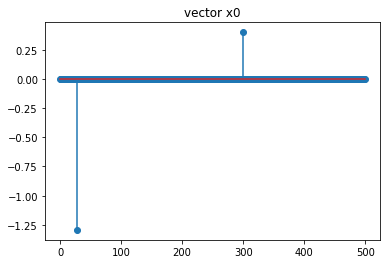

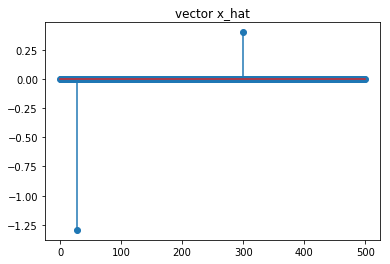

In [9]:
plt.stem(x0)
plt.title('vector x0')
plt.show()
plt.stem(x_hat)
plt.title('vector x_hat')
plt.show()